# Residue selection for GBDT model

Top features are:
resname LIG and resSeq 2000 and name C  resname ASN and resSeq 507 and name ND2 
resname LIG and resSeq 2000 and name N  resname ASP and resSeq 147 and name OD2 
resname LIG and resSeq 2000 and name C  resname ASP and resSeq 147 and name OD2 
resname LIG and resSeq 2000 and name N  resname ILE and resSeq 222 and name CD1 
resname LIG and resSeq 2000 and name N  resname ASP and resSeq 147 and name OD1 
resname LIG and resSeq 2000 and name C1  resname LEU and resSeq 225 and name CD1 
resname LIG and resSeq 2000 and name C1  resname ASP and resSeq 147 and name OD1 
resname LIG and resSeq 2000 and name C  resname LEU and resSeq 225 and name CD1 
resname LIG and resSeq 2000 and name C1  resname THR and resSeq 234 and name OG1 
resname LIG and resSeq 2000 and name C1  resname LEU and resSeq 225 and name CD2 
Top features are:
resname LIG and resSeq 2000 and name C3  resname ILE and resSeq 222 and name CD1 
resname LIG and resSeq 2000 and name C3  resname ASP and resSeq 147 

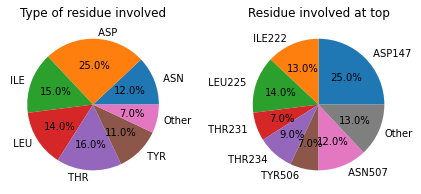

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from collections import Counter

UniRes = []
all_adrops = []
all_gimports = []
for i in range(10):
    reps = 10
    adrops = []
    gimport = []

    # Fetch the data from the binary files
    for R in range(0, reps):
        results = pickle.load(open("GBDT_res_mixed_d{}_{}.bin".format(i,R), "rb"))
        adrop = results["mltsa"]
        idx = results["idx"]
        model = results["model"]
        FI = model.feature_importances_
        sort = np.argsort(idx)
        adrops.append(np.mean(np.array(adrop).T[sort], axis=1))
        gimport.append(FI[sort])
    all_adrops.append(adrops)
    all_gimports.append(gimport)

    # Analyse the data to get the top features of each replica
    tops = []
    top_size = 10
    for rep in gimport:
        idx = (-rep).argsort()[:top_size]
        tops.append(list(idx))
    mx = len(tops)

    tops = np.concatenate(tops)
    top_features = Counter(list(tops))

    # Interpret which features are top
    selection_strings = np.load("../string_selections_GPCR_{}.npy".format(i))
    with open("FI_top_GBDT_{}.txt".format(i), "w") as f:
        for feature, t in top_features.most_common():
            UniRes.append(selection_strings[feature][0][7:11] + selection_strings[feature][0][23:27])
            UniRes.append(selection_strings[feature][1][7:11] + selection_strings[feature][1][23:27])
            f.write("{}\t{}\t{}\t{}\n".format(feature, np.around((t/mx)*100), selection_strings[feature][0],selection_strings[feature][1]))
            
    print("Top features are:")
    for feature, t in top_features.most_common(10):
        print(selection_strings[feature][0],selection_strings[feature][1])

# Count the residue involved in the selected CVs
UniResCount = Counter(UniRes)
UniResType = [x[0:4] for x in UniRes]
UniResType = Counter(UniResType)

# Draw pie charts of the counting result
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

dat = np.array([float(v) for v in UniResType.values()][1:])
lab = np.array([l for l in UniResType][1:])
yes = np.where(dat > (np.sum(dat)*0.1))[0]
no = np.where(dat <= (np.sum(dat)*0.1))[0]
good = list(dat[yes])
other = np.sum(dat[no])
good.append(other)
lab = list(lab[yes])
lab.append("Other")
dat = np.array(good)
lab = np.array(lab)
ax1.pie(dat, labels=lab, autopct='%1.1f%%')

dat = np.array([float(v) for v in UniResCount.values()][1:])
lab = np.array([l for l in UniResCount][1:])
yes = np.where(dat > (np.sum(dat)*0.05))[0]
no = np.where(dat <= (np.sum(dat)*0.05))[0]
good = list(dat[yes])
other = np.sum(dat[no])
good.append(other)
lab = list(lab[yes])
lab.append("Other")
sort = np.argsort([l[-4:] for l in lab])
dat = np.array(good)[sort]
lab = np.array(lab)[sort]

ax2.pie(dat, labels=lab, autopct='%1.1f%%')
ax1.set_title("Type of residue involved")
ax2.set_title("Residue involved at top")
plt.tight_layout()
# plt.savefig("pie2_10top.svg")
plt.show()

# Residue selection for MLP model

Top features are:
resname LIG and resSeq 2000 and name C  resname ASP and resSeq 147 and name OD2 
resname LIG and resSeq 2000 and name N  resname THR and resSeq 231 and name CB 
resname LIG and resSeq 2000 and name C  resname ASP and resSeq 147 and name OD1 
resname LIG and resSeq 2000 and name C  resname LEU and resSeq 225 and name CB 
resname LIG and resSeq 2000 and name N  resname TYR and resSeq 529 and name OH 
resname LIG and resSeq 2000 and name N  resname ASP and resSeq 147 and name OD2 
resname LIG and resSeq 2000 and name C  resname ASN and resSeq 507 and name ND2 
resname LIG and resSeq 2000 and name C1  resname THR and resSeq 231 and name CB 
resname LIG and resSeq 2000 and name N  resname ASN and resSeq 507 and name ND2 
resname LIG and resSeq 2000 and name C  resname THR and resSeq 231 and name OG1 
Top features are:
resname LIG and resSeq 2000 and name C3  resname ILE and resSeq 222 and name CD1 
resname LIG and resSeq 2000 and name C2  resname THR and resSeq 231 and nam

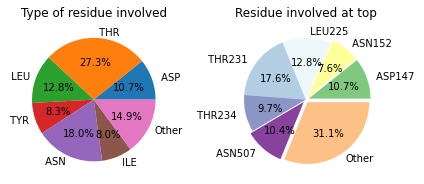

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from collections import Counter

UniRes = []
all_adrops = []
for i in range(10):
    reps = 10
    adrops = []

    # Fetch the data from the binary files
    for R in range(0, reps):
        results = pickle.load(open("MLP_res_mixed_d{}_{}.bin".format(i,R), "rb"))
        adrop = results["mltsa"]
        idx = results["idx"]
        model = results["model"]
        sort = np.argsort(idx)
        adrops.append(np.mean(np.array(adrop).T[sort], axis=1))
    all_adrops.append(adrops)

    # Analyse the data to get the top features of each replica
    tops = []
    top_size = 10
    for rep in adrops:
        idx = (rep).argsort()[:top_size]
        tops.append(list(idx))
    mx = len(tops)

    tops = np.concatenate(tops)
    top_features = Counter(list(tops))

    # Interpret which features are top
    selection_strings = np.load("../string_selections_GPCR_{}.npy".format(i))
    with open("adrop_top_MLP_{}.txt".format(i), "w") as f:
        for feature, t in top_features.most_common():
            UniRes.append(selection_strings[feature][0][7:11] + selection_strings[feature][0][23:27])
            UniRes.append(selection_strings[feature][1][7:11] + selection_strings[feature][1][23:27])
            f.write("{}\t{}\t{}\t{}\n".format(feature, np.around((t/mx)*100), selection_strings[feature][0],selection_strings[feature][1]))
            
    print("Top features are:")
    for feature, t in top_features.most_common(10):
        print(selection_strings[feature][0],selection_strings[feature][1])

# Count the residue involved in the selected CVs
UniResCount = Counter(UniRes)
UniResType = [x[0:4] for x in UniRes]
UniResType = Counter(UniResType)

# Draw pie charts of the counting result
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

dat = np.array([float(v) for v in UniResType.values()][1:])
lab = np.array([l for l in UniResType][1:])
yes = np.where(dat > (np.sum(dat)*0.07))[0]
no = np.where(dat <= (np.sum(dat)*0.07))[0]
good = list(dat[yes])
other = np.sum(dat[no])
good.append(other)
lab = list(lab[yes])
lab.append("Other")
dat = np.array(good)
lab = np.array(lab)
ax1.pie(dat, labels=lab, autopct='%1.1f%%')

dat = np.array([float(v) for v in UniResCount.values()][1:])
lab = np.array([l for l in UniResCount][1:])
yes = np.where(dat > (np.sum(dat)*0.07))[0]
no = np.where(dat <= (np.sum(dat)*0.07))[0]
good = list(dat[yes])
other = np.sum(dat[no])
good.append(other)
lab = list(lab[yes])
lab.append("Other")
sort = np.argsort([l[-4:] for l in lab])
dat = np.array(good)[sort]
lab = np.array(lab)[sort]
myexplode = [0.05, 0.05, 0, 0, 0, 0.05, 0.05]
colors = [ '#7fc97f','#ffff99','#edf8fb','#b3cde3','#8c96c6','#88419d','#fdc086' ]
ax2.pie(dat, labels=lab, explode=myexplode, colors=colors, autopct='%1.1f%%')
ax1.set_title("Type of residue involved")
ax2.set_title("Residue involved at top")
plt.tight_layout()
# plt.savefig("pie2_10top.svg")
plt.show()

In [5]:
import matplotlib 
matplotlib.rcParams['savefig.dpi'] = 300
matplotlib.rcParams['figure.dpi'] = 300

d = {'CYS': 'C', 'ASP': 'D', 'SER': 'S', 'GLN': 'Q', 'LYS': 'K',
     'ILE': 'I', 'PRO': 'P', 'THR': 'T', 'PHE': 'F', 'ASN': 'N', 
     'GLY': 'G', 'HIS': 'H', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W', 
     'ALA': 'A', 'VAL':'V', 'GLU': 'E', 'TYR': 'Y', 'MET': 'M'}

# Accuracy drop (MLP)

In [6]:
datasets = 10
strings = []
for d in range(datasets):
    selection_strings = np.load("string_selections_GPCR_{}.npy".format(d))
    strings.append(selection_strings)
    a = np.loadtxt("adrop_top_MLP_{}.txt".format(d), dtype=str)
    cut = np.where(a.T[1].astype(float) > 50)

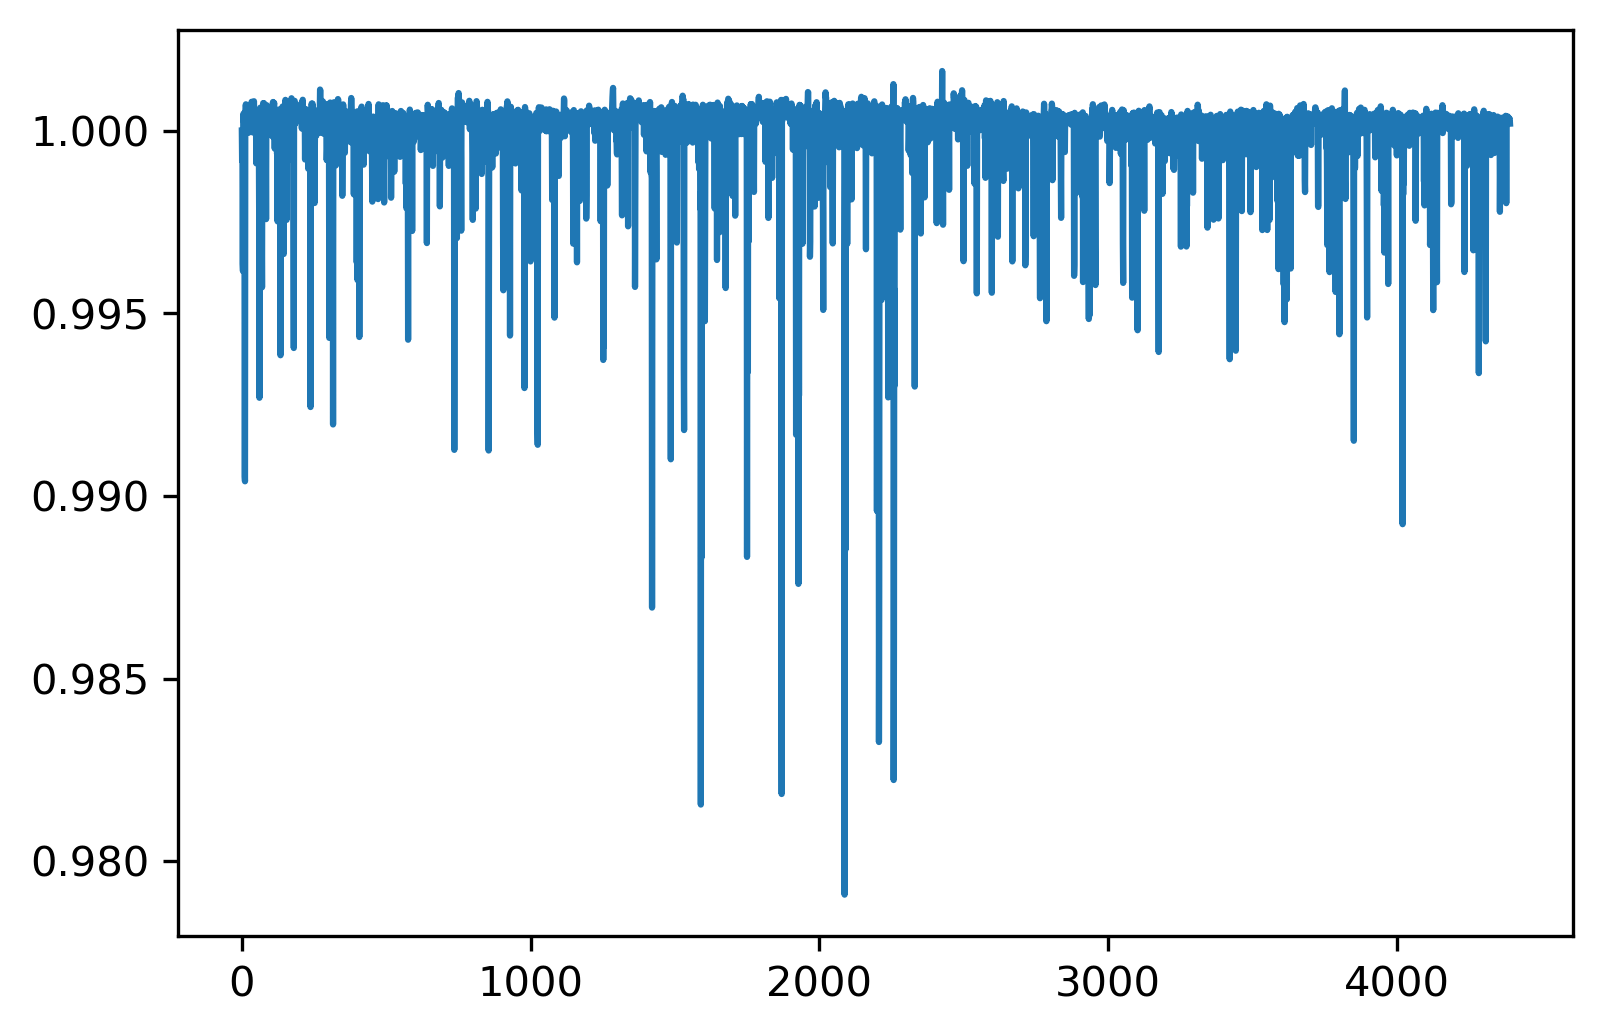

In [7]:
total = []
for rep in all_adrops: 
    mean = np.mean(rep, axis=0)
    total.append(np.mean(rep, axis=0)/(np.mean(mean)))
    
plt.plot(np.concatenate(total))
total = np.concatenate(total)

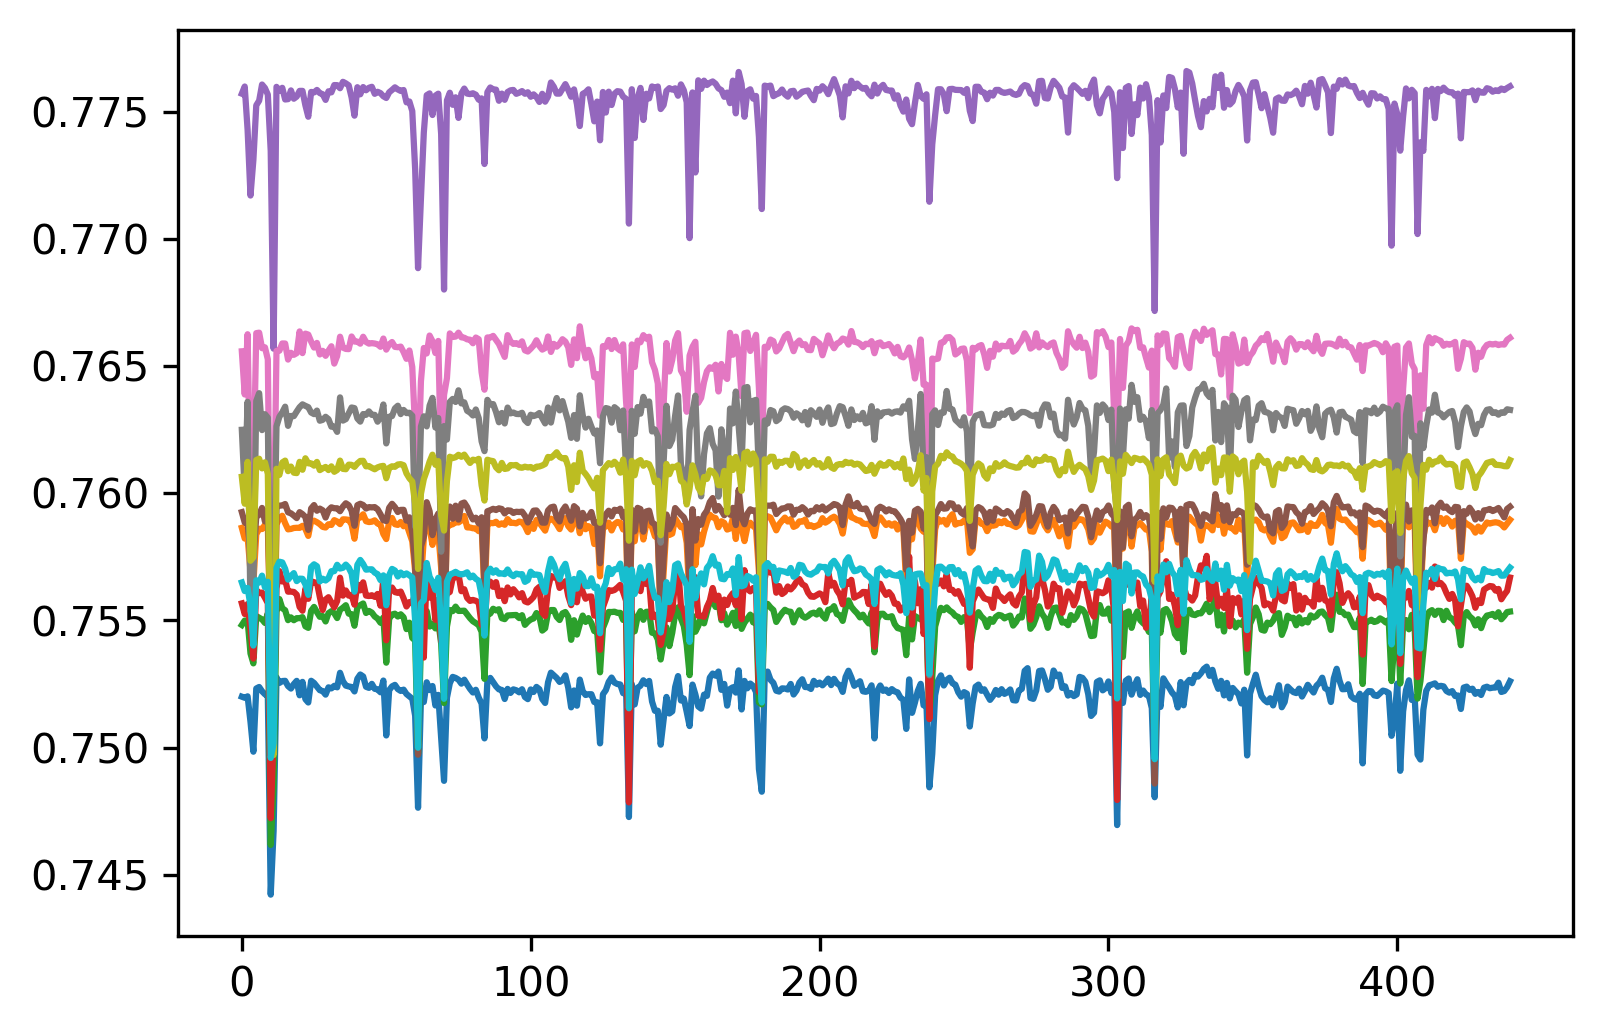

In [8]:
plt.plot(np.array(all_adrops[0]).T);

# Feature importance (GBDT)

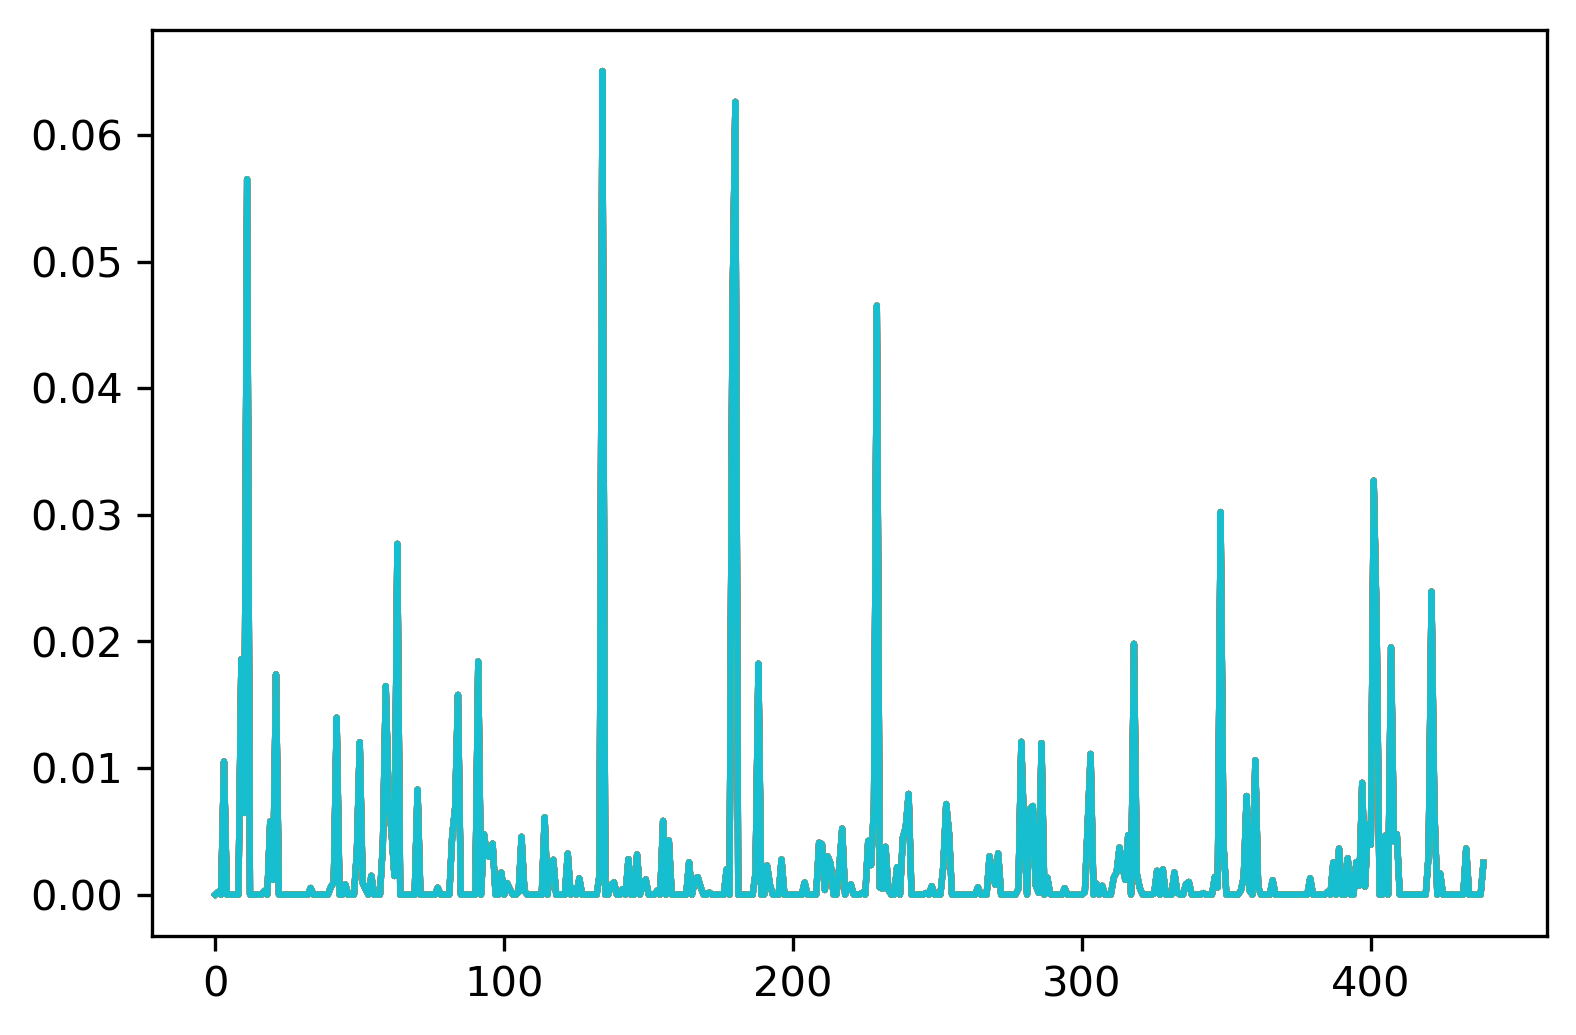

In [9]:
plt.plot(np.array(all_gimports[0]).T);

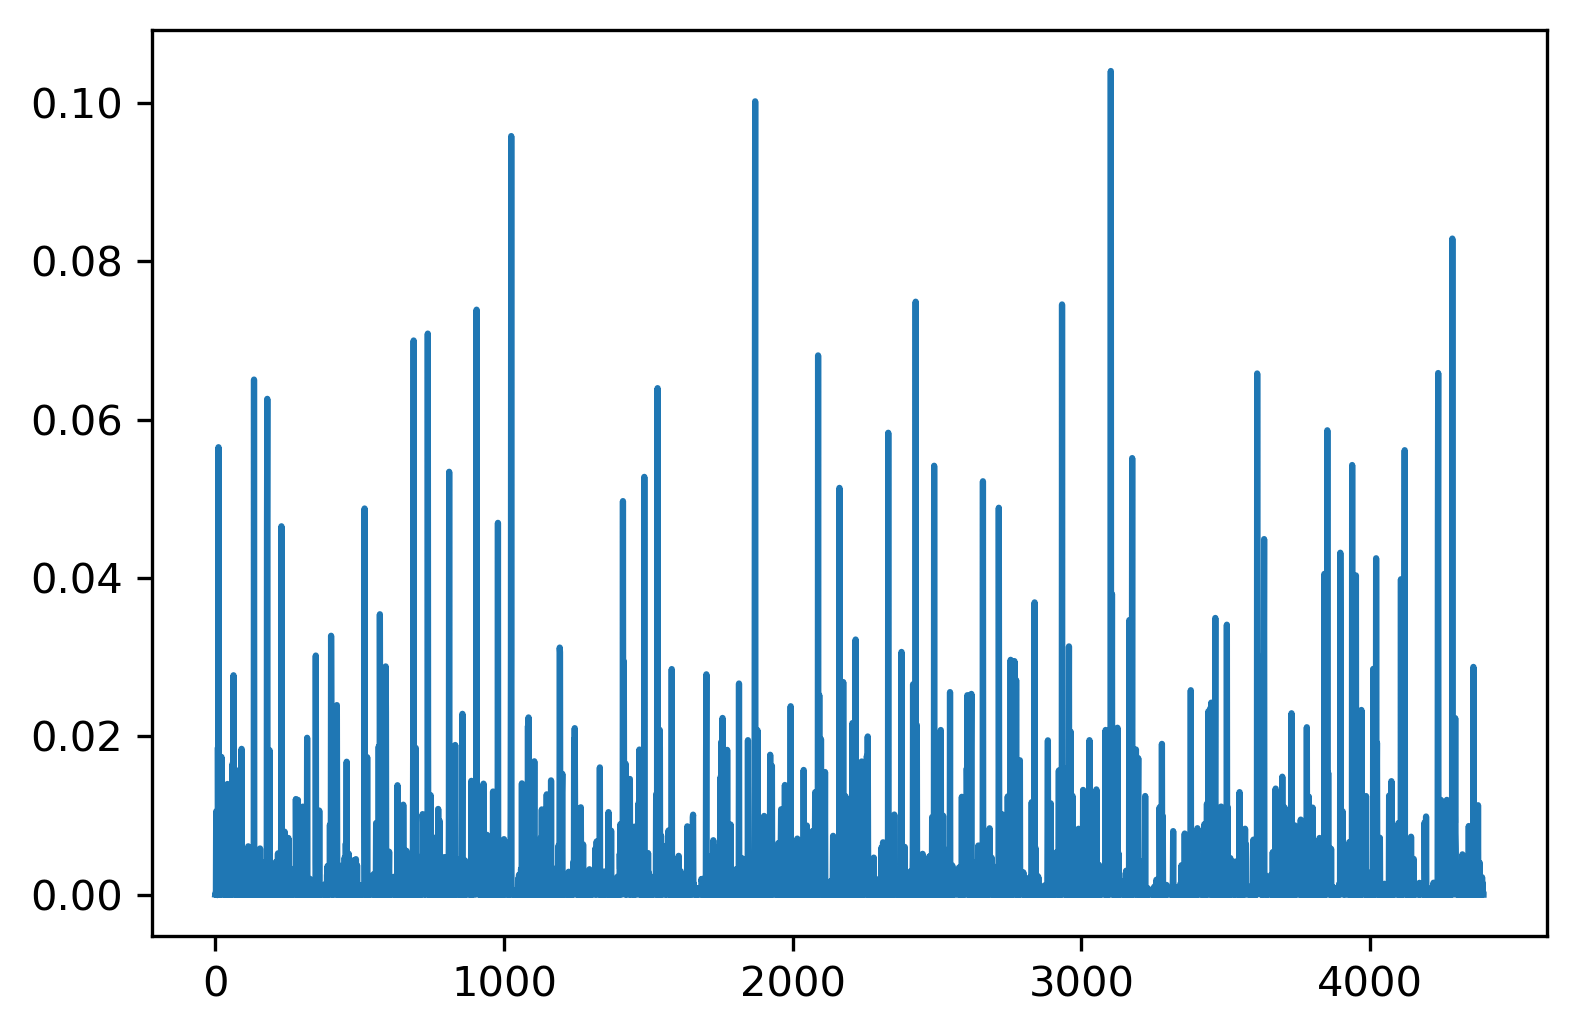

In [10]:
total_FI = []
for rep in all_gimports:
    mean = np.mean(rep, axis=0)
    #total_FI.append(mean/np.max(mean))
    total_FI.append(mean)
    
plt.plot(np.concatenate(total_FI))
total_FI = np.concatenate(total_FI)

In [11]:
left = []
right = []
unique_res = []
labels_res = []

seles = np.concatenate(strings)

for pair in seles:
    left.append(["LIG-"+pair[0].split()[-1]])
    right.append(pair[1].split()[-7] + pair[1].split()[-4] +"-"+ pair[1].split()[-1])
    #labels_res.append(d[pair[1].split()[-7]] + pair[1].split()[-4])
    labels_res.append(pair[1].split()[-7] + pair[1].split()[-4])
    unique_res.append(pair[1].split()[-4])
u_res = np.unique(unique_res)

idx_u = []
for u in u_res:
    idx_u.append(np.where(u == np.array(unique_res))[0])
    
new_idx = np.concatenate(idx_u)
new_seles = seles[new_idx]

In [13]:
#FI = np.loadtxt("ginis_plot.txt")[new_idx]
#AD = np.loadtxt("adrop_plot.txt")[new_idx]
AD = total[new_idx]
FI = total_FI[new_idx]
#AD = AD/np.mean(AD)
    
top_size = 20
top_FI = (-FI).argsort()[:top_size]
top_AD = (AD).argsort()[:top_size]

In [ ]:
#tt = [147, 148, 199,231, 529]
tt = [116, 147, 222, 225, 231, 507] 
t = u_res
#cs =['#d7191c','#fdae61','#ffffbf','#abd9e9','#2c7bb6']
cs = []
cmap = matplotlib.cm.get_cmap('gray')
for n,x in enumerate(t):
    #cs.append(cmap(float(int(n)/(len(t)+10))))
    if n % 2 == 0:
        cs.append("darkgrey")
    else:
        cs.append("silver")

#ahh = ["deeppink", "blue", "green", "orange", "purple"]
#ahh = ["#E910FF" , "#4DFF3E","#E910FF" ,"#4067FF", "#FFB532",  "#FF2A26"]
ahh = ['#fc8d62', '#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854']
#ahh = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e']
cs_top = []
cmap = matplotlib.cm.get_cmap('Set1')
c = 0
for n,x in enumerate(t):
    if int(x) in np.array(tt):
        print("color")
        cs_top.append(ahh[c])
        c += 1 
    else:
        cs_top.append(cmap(float(int(n)/len(t))))

# The comparison of CVs and residues selection between MLP and GBDT model

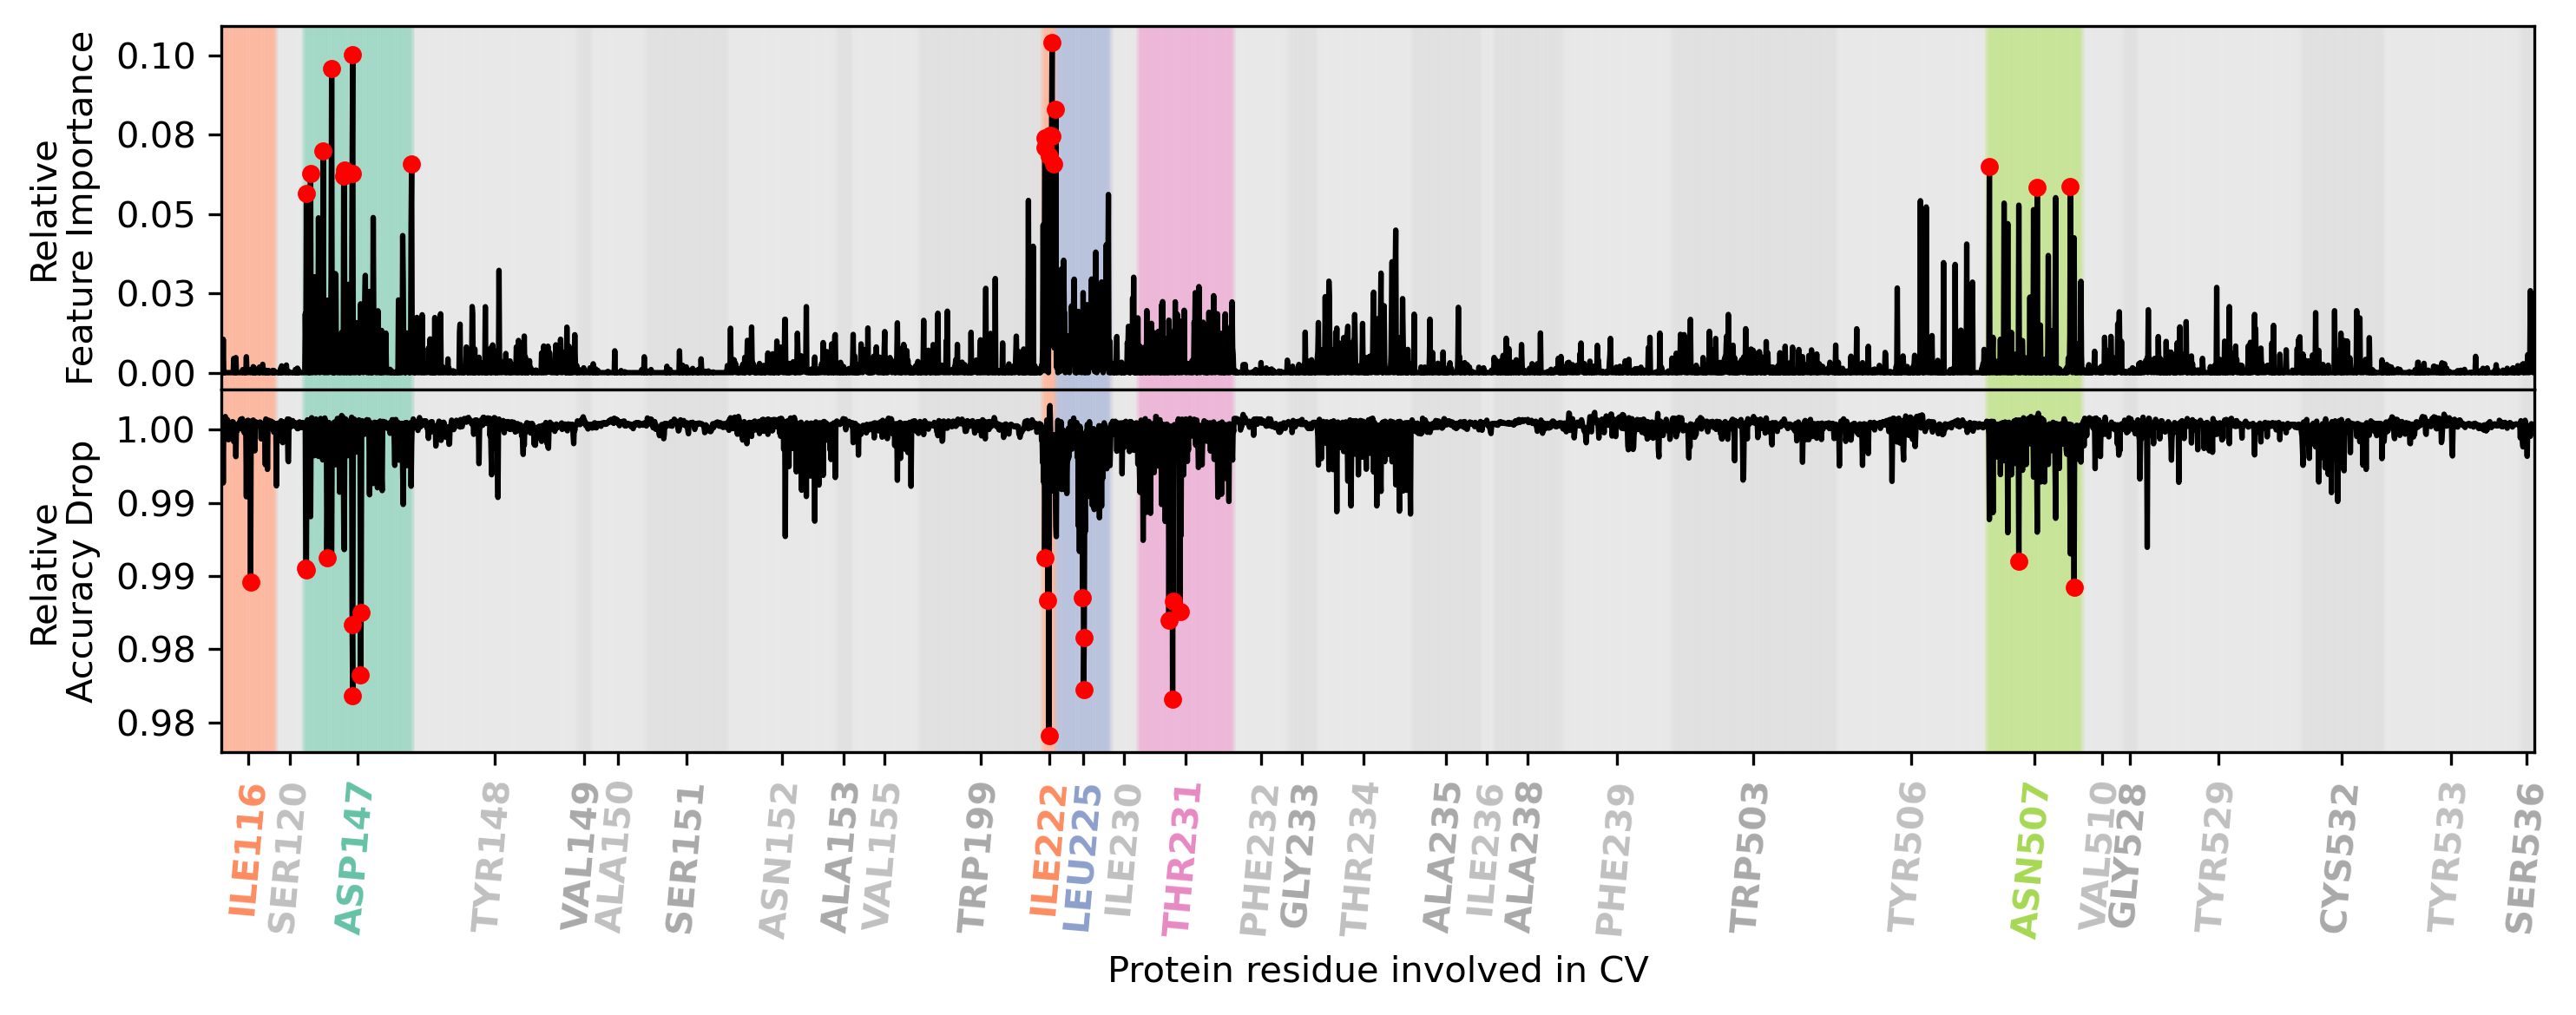

In [15]:
from matplotlib.ticker import FormatStrFormatter

fig = plt.figure(figsize=(10,4))
gs = fig.add_gridspec(2, hspace=0)
axs = gs.subplots(sharex=True)

begs = []
for n,l in enumerate(t):
    if int(l) in tt:
        col=cs_top
        al = 0.08
    else:
        col=cs
        al = 0.03
    span = np.where(str(l) == np.array(unique_res)[new_idx])[0]
    for d in span:
        axs[0].axvline(ymin=0, x=d, color = col[n], alpha=al)
    #axs[0].axvline(ymin=0, x=span[0], color = col[n], alpha=0.5)
    #axs[0].axvline(ymin=0, x=span[-1], color = col[n], alpha=0.5)
    begs.append(int((span[-1] + span[0])/2))
        
axs[0].plot(FI, color="black")
c_top = [np.where(t.astype(int) == a)[0][0] for a in np.array(unique_res)[new_idx][top_FI].astype(int)]
axs[0].plot(top_FI, FI[top_FI],"o",  color="red", markersize=4)
#axs[0].scatter(x=top_FI, y=FI[top_FI], color=np.array(cs_top)[c_top], s=20)
#axs[0].set_ylim(0, 0.04)

for n,l in enumerate(t):
    if int(l) in tt:
        col=cs_top
        al= 0.08
    else:
        col=cs
        al= 0.03
    span = np.where(str(l) == np.array(unique_res)[new_idx])[0]
    for d in span:
        axs[1].axvline(ymax=1, x=d, color = col[n], alpha=al)
    #axs[1].axvline(ymax=1, x=span[0], color = col[n], alpha=0.5)
    #axs[1].axvline(ymax=1, x=span[-1], color = col[n], alpha=0.5)

axs[1].plot(AD, color="black")
c_top = [np.where(t.astype(int) == a)[0][0] for a in np.array(unique_res)[new_idx][top_AD].astype(int)]
axs[1].plot(top_AD, AD[top_AD], "o",  color="red", markersize=4)
#axs[1].scatter(x=top_AD, y=AD[top_AD], color=np.array(cs_top)[c_top], s=20)

axs[0].set_ylabel("Relative\nFeature Importance",  multialignment='center')
axs[1].set_ylabel("Relative\nAccuracy Drop",  multialignment='center')
plt.xticks(np.arange(0, len(labels_res))[np.array(begs)], np.array(labels_res)[new_idx][np.array(begs)], rotation=85, weight="bold")
plt.xlabel("Protein residue involved in CV")
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

for n, ticklabel in enumerate(plt.gca().get_xticklabels()):
    if int(t[n]) in tt:
        tickcolor=cs_top[n]
    else:
        tickcolor=cs[n]
    ticklabel.set_color(tickcolor)

plt.xlim(-1, len(AD)+1)
plt.tight_layout()
plt.savefig("6A_FI+AD.svg")

In [16]:
avg_res_FI = []
for l in t:
    span = np.where(str(l) == np.array(unique_res)[new_idx])[0]
    avg_res_FI.append(np.mean(FI[span]))

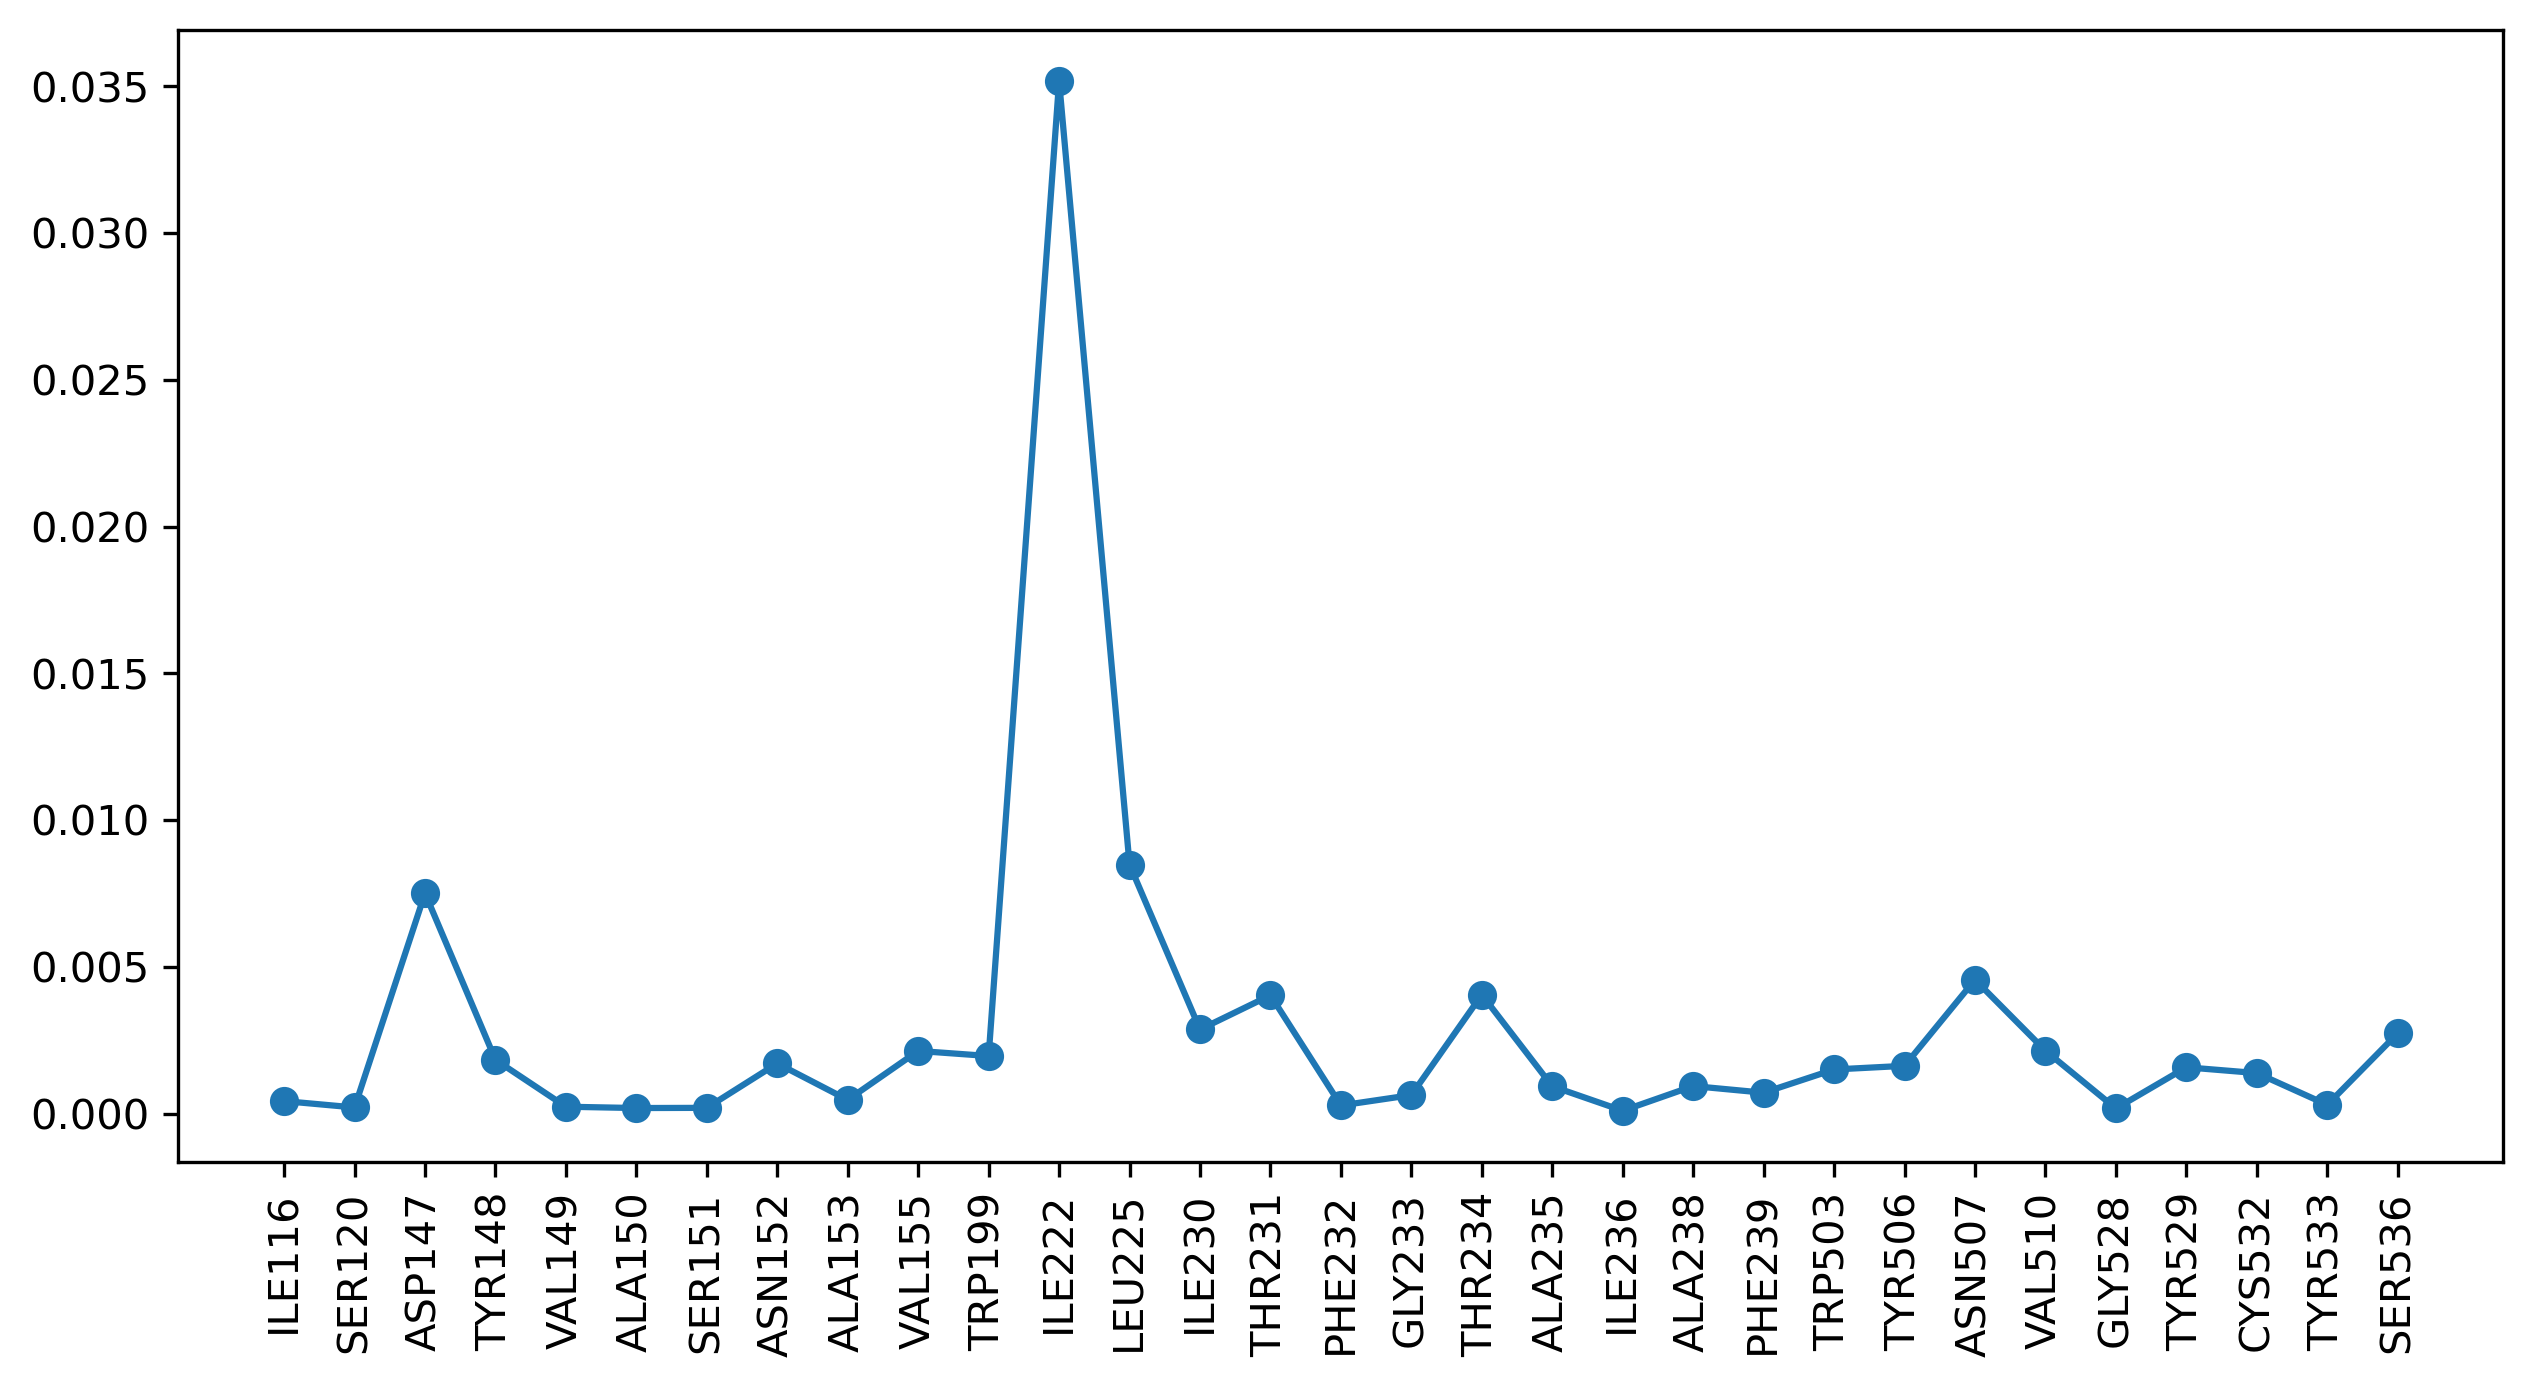

In [19]:
plt.figure(figsize=(10,5))
plt.plot(avg_res_FI, "-o")
plt.xticks(np.arange(0, len(avg_res_FI)), np.array(labels_res)[new_idx][np.array(begs)], rotation=90);

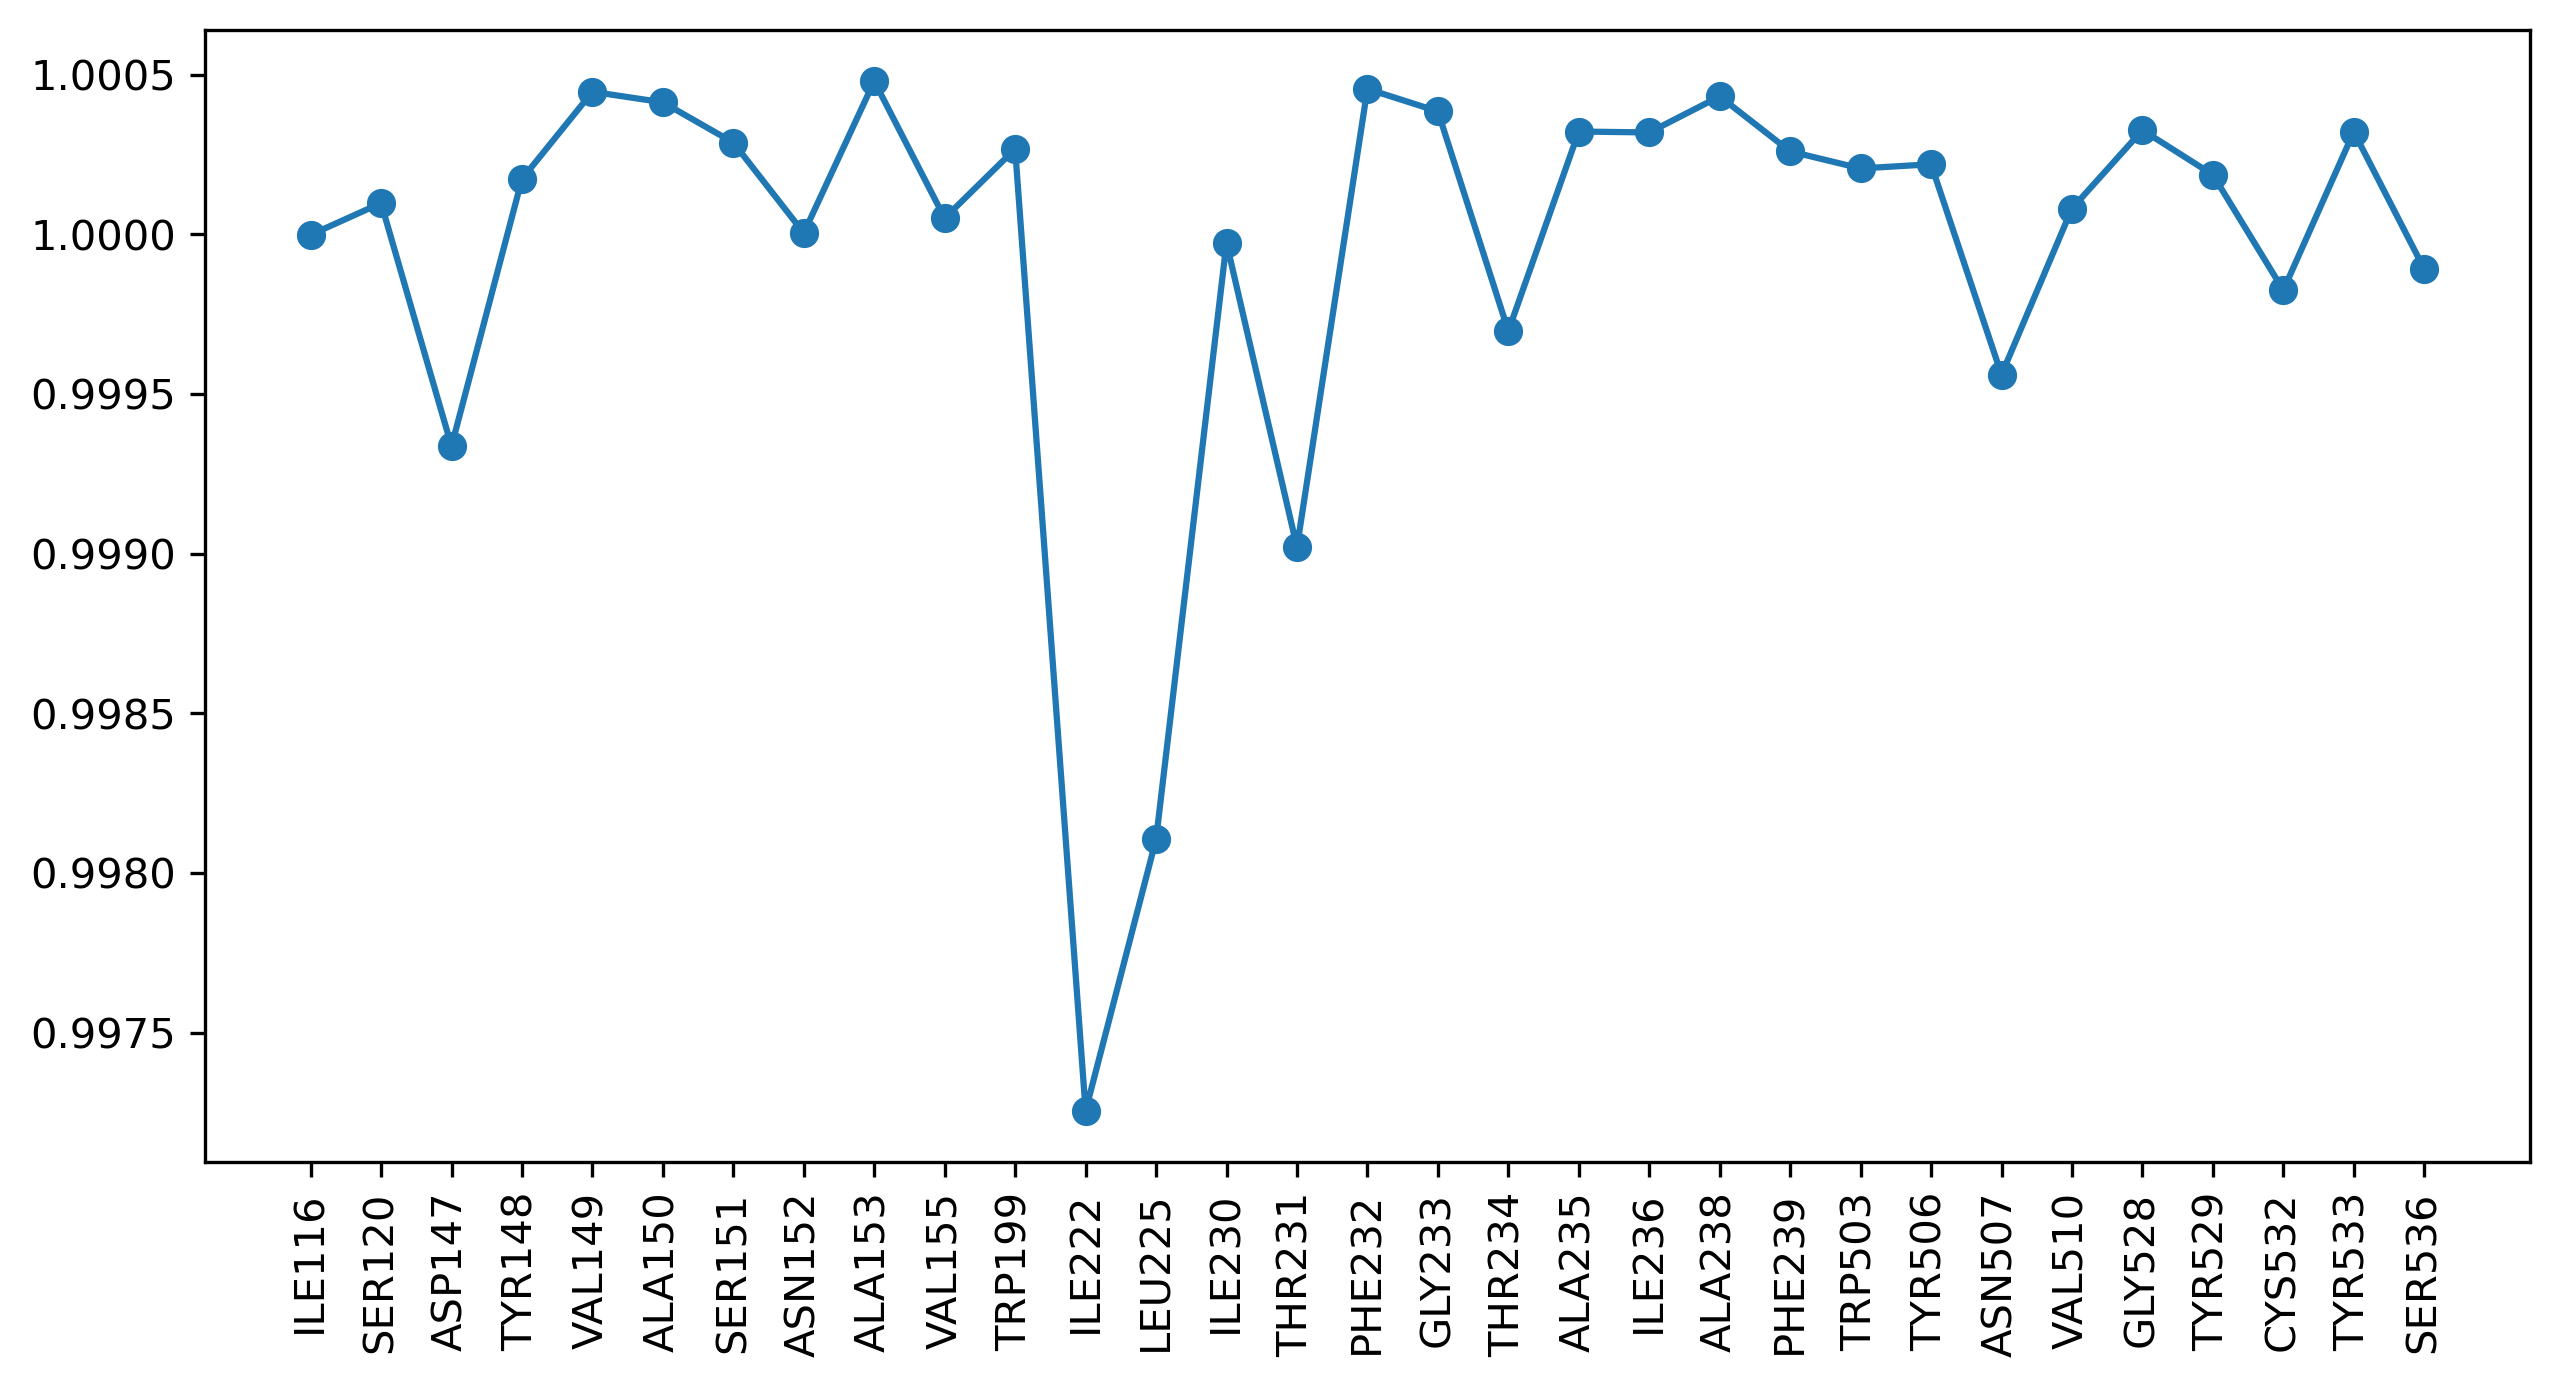

In [19]:
avg_res_AD = []
for l in t:
    span = np.where(str(l) == np.array(unique_res)[new_idx])[0]
    avg_res_AD.append(np.mean(AD[span]))

plt.figure(figsize=(10,5))
plt.plot(avg_res_AD, "-o")
plt.xticks(np.arange(0, len(avg_res_AD)), np.array(labels_res)[new_idx][np.array(begs)], rotation=90);

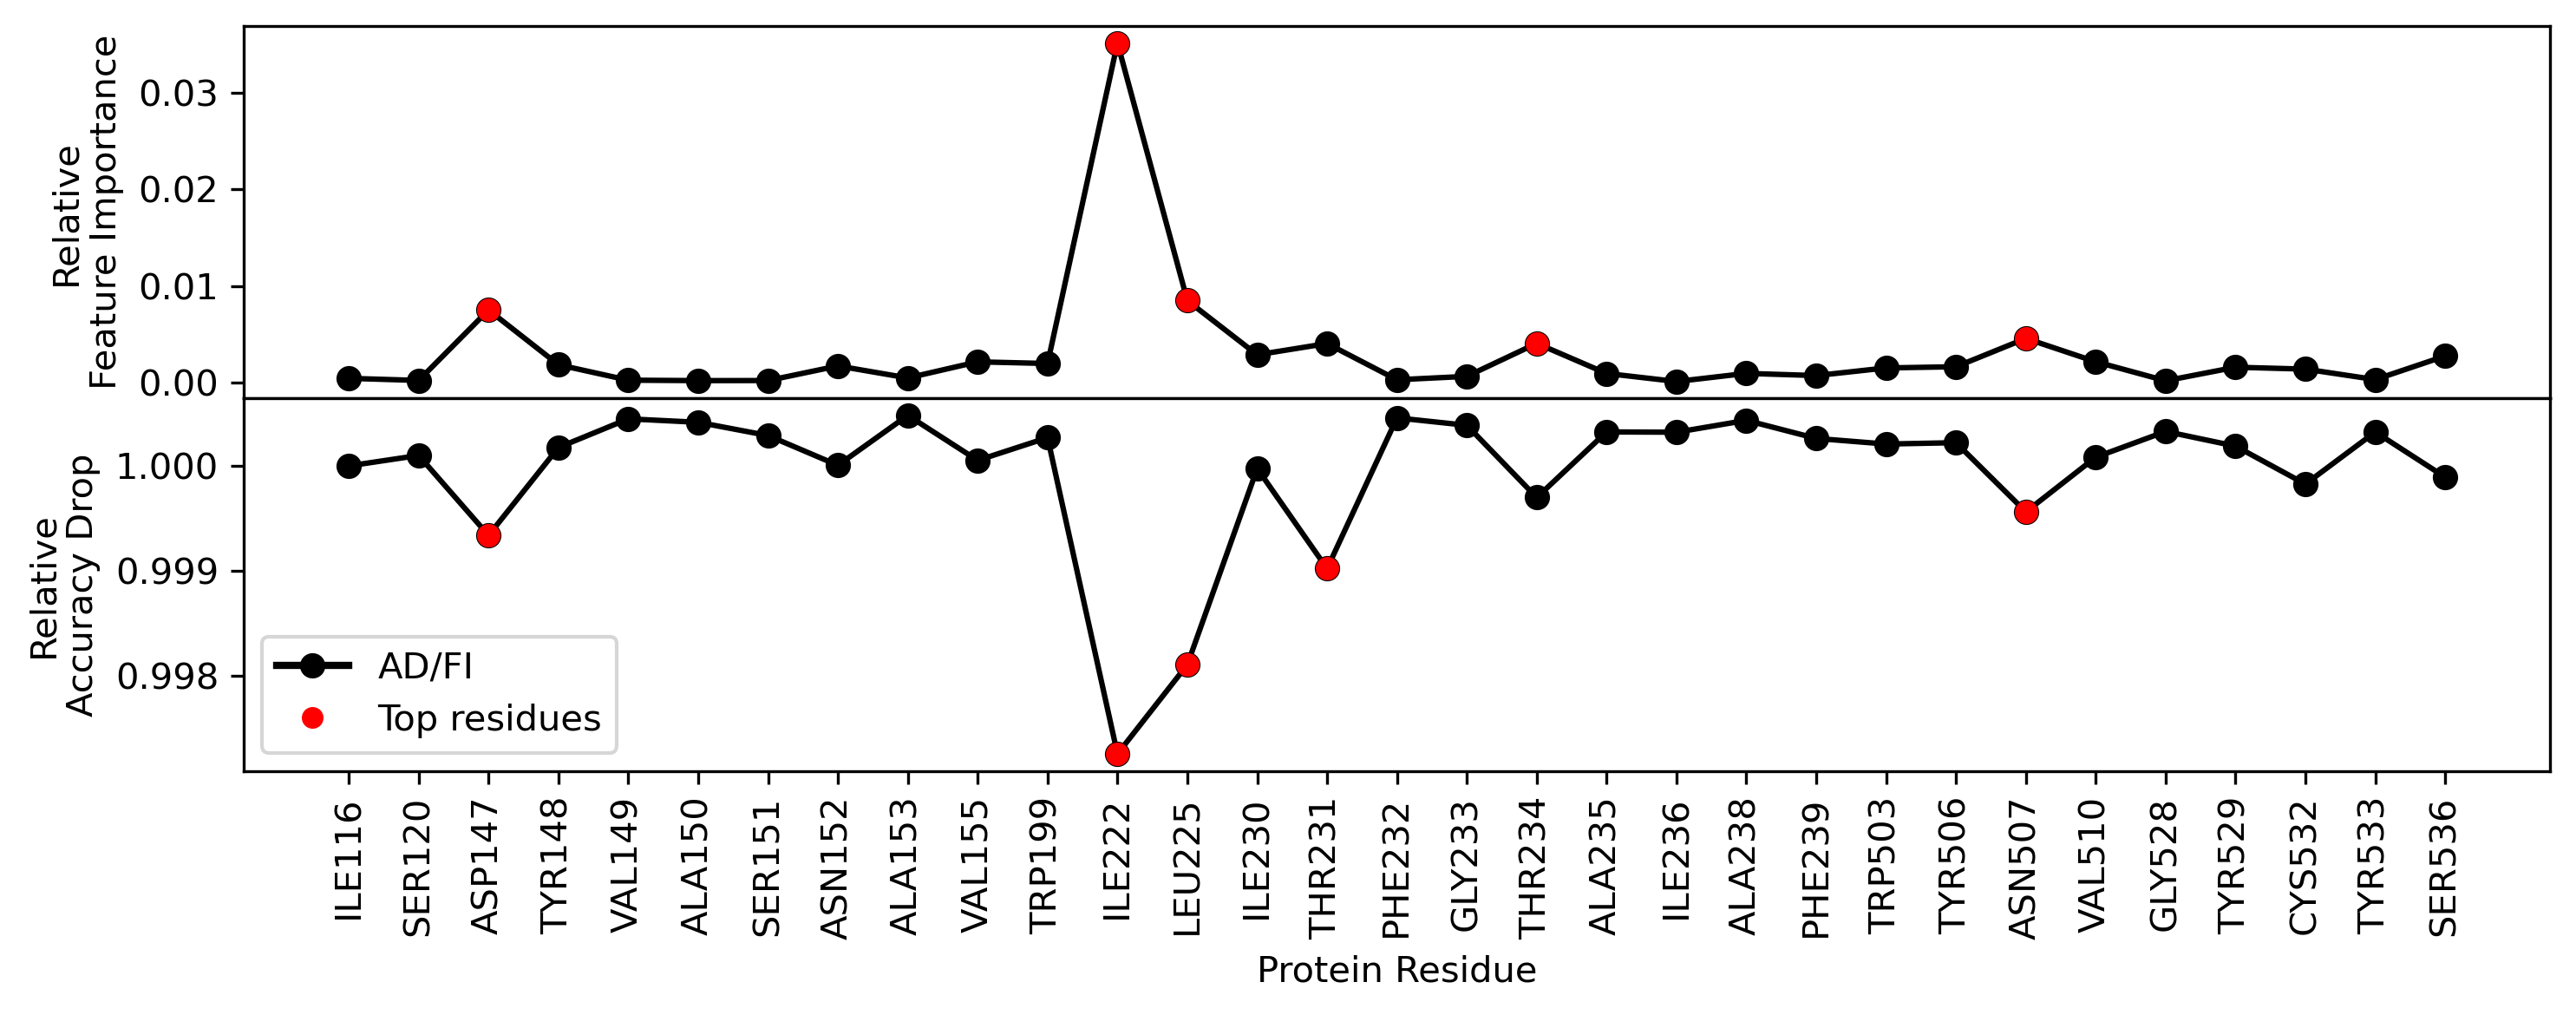

In [74]:
fig = plt.figure(figsize=(10,4))
gs = fig.add_gridspec(2, hspace=0)
axs = gs.subplots(sharex=True)

top_size = 5
top_FI = (-np.array(avg_res_FI)).argsort()[:top_size]
top_AD = (np.array(avg_res_AD)).argsort()[:top_size]


axs[0].plot(avg_res_FI, "-o", color="black")
axs[1].plot(avg_res_AD, "-o", color="black")
for t, tt in zip(top_FI, top_AD):
    axs[0].scatter(t, np.array(avg_res_FI)[t], s=30, color="red", zorder=2)
    axs[1].scatter(tt, np.array(avg_res_AD)[tt], s=30, color="red", zorder=2)

axs[0].set_ylabel("Relative\nFeature Importance",  multialignment='center')
axs[1].set_ylabel("Relative\nAccuracy Drop",  multialignment='center')
plt.xticks(np.arange(0, len(avg_res_AD)), np.array(labels_res)[new_idx][np.array(begs)], rotation=90);
plt.xlabel("Protein Residue")

from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], color='black',marker="o", lw=2, label='AD/FI'),
                   Line2D([0], [0], marker='o', color='r', label='Top residues',
                           markersize=5, lw=0)]
plt.legend(handles=legend_elements)
plt.savefig("6A_average_FI_AD.svg")
plt.tight_layout()